In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from helpers import *

In [23]:
wikiurl = "https://commons.wikimedia.org/wiki/Data:Ncei.noaa.gov/weather/Boston.tab"
data = get_dataframe(wikiurl)

# drop the unwanted columns
data.drop(["precip", "precipDays"], axis=1, inplace = True, level=0)
data.drop(range(226), axis = 0, inplace = True)
data.reset_index(drop=True, inplace=True)

# data.to_csv('boston_weather.csv', index=False)

In [24]:
dates_series = pd.Series(data.date.values.flatten())

data['date'] = convert_year(dates_series.str.split('-'))
print(type(dates_series.str.split('-')))

<class 'pandas.core.series.Series'>


In [1]:
plot_double_scatter(data.copy(), 'date', 'avgHighTemp', 'snowfall', \
    y_label1='Average High Temp (C)', y_label2='Snowfall (mm)', fit='first', \
        month_num=2)

NameError: name 'plot_double_scatter' is not defined

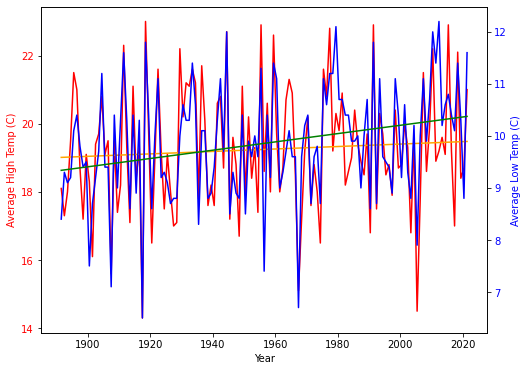

In [20]:
plot_double_scatter(data.copy(), 'date', 'avgHighTemp', 'avgLowTemp', \
                    y_label1='Average High Temp (C)', \
                    y_label2='Average Low Temp (C)', fit='both', month_num=5)